In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv(r"F:\AI\Project\enhanced_fraud_dataset.csv")

In [4]:
df.head()

,transaction_id,transaction_date,step,hour_of_day,is_weekend,type,amount,amount_category,is_round_amount,nameOrig,...,latitudeDest,longitudeDest,distance_km,time_since_last_tx,anomalyFlags,anomaly_categories,anomaly_count,risk_score,risk_category,isFraud
0,TX000000,2024-01-05 07:00:00,103,7,0,PAYMENT,673.812297,MEDIUM,0,C000000,...,-29.339174,27.634174,30.504904,24.0,NORMAL,NO_ANOMALY,0,0,NO_RISK,0
1,TX000001,2024-01-19 04:00:00,436,4,0,PAYMENT,146.861217,MEDIUM,0,C000001,...,-29.436269,27.098685,36.565861,24.0,LARGE_BALANCE_DROP_80PCT,BALANCE,1,20,LOW_RISK,0
2,TX000002,2024-01-12 07:00:00,271,7,0,DEBIT,959.488104,MEDIUM,0,C000002,...,-29.632666,28.214545,54.127464,24.0,NORMAL,NO_ANOMALY,0,0,NO_RISK,0
3,TX000003,2024-01-05 11:00:00,107,11,0,TRANSFER,1014.469964,LARGE,0,C000003,...,-29.121128,28.429114,89.556562,24.0,NORMAL,NO_ANOMALY,0,0,NO_RISK,0
4,TX000004,2024-01-04 00:00:00,72,0,0,PAYMENT,1083.331991,LARGE,0,C000004,...,-29.272631,27.543695,29.198106,24.0,NORMAL,NO_ANOMALY,0,0,NO_RISK,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           2000 non-null   object 
 1   transaction_date         2000 non-null   object 
 2   step                     2000 non-null   int64  
 3   hour_of_day              2000 non-null   int64  
 4   is_weekend               2000 non-null   int64  
 5   type                     2000 non-null   object 
 6   amount                   2000 non-null   float64
 7   amount_category          2000 non-null   object 
 8   is_round_amount          2000 non-null   int64  
 9   nameOrig                 2000 non-null   object 
 10  oldbalanceOrg            2000 non-null   float64
 11  newbalanceOrig           2000 non-null   float64
 12  nameDest                 2000 non-null   object 
 13  oldbalanceDest           2000 non-null   float64
 14  newbalanceDest          

In [6]:
df.isnull

<bound method DataFrame.isnull of      transaction_id     transaction_date  step  hour_of_day  is_weekend  \
0          TX000000  2024-01-05 07:00:00   103            7           0   
1          TX000001  2024-01-19 04:00:00   436            4           0   
2          TX000002  2024-01-12 07:00:00   271            7           0   
3          TX000003  2024-01-05 11:00:00   107           11           0   
4          TX000004  2024-01-04 00:00:00    72            0           0   
...             ...                  ...   ...          ...         ...   
1995       TX001995  2024-01-06 01:00:00   121            1           1   
1996       TX001996  2024-01-05 11:00:00   107           11           0   
1997       TX001997  2024-01-29 15:00:00   687           15           0   
1998       TX001998  2024-01-09 12:00:00   204           12           0   
1999       TX001999  2024-01-07 21:00:00   165           21           1   

          type       amount amount_category  is_round_amount name

In [7]:
df.describe()

,step,hour_of_day,is_weekend,amount,is_round_amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,amount_to_balance_ratio,latitudeOrig,longitudeOrig,latitudeDest,longitudeDest,distance_km,time_since_last_tx,anomaly_count,risk_score,isFraud
count,2000.000000,2000.00000,2000.00000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000
mean,366.025000,11.59300,0.25650,1359.399768,0.0,4823.319460,4488.116515,3045.010815,3801.314032,2.341993,-29.495531,27.754335,-29.503772,27.739181,65.925682,24.0,0.609000,10.397500,0.050000
std,218.697542,6.85703,0.43681,1803.365225,0.0,4785.040311,4965.920851,3017.163337,3408.931814,30.312277,0.288057,0.429858,0.288327,0.426430,32.180216,0.0,1.055782,17.860963,0.217999
min,1.000000,0.00000,0.00000,0.013944,0.0,0.932728,0.000000,4.069332,0.000000,0.000004,-29.999636,27.000178,-29.999893,27.000263,0.985574,24.0,0.000000,0.000000,0.000000
25%,171.750000,6.00000,0.00000,271.847462,0.0,1386.919945,680.613206,908.147634,1345.892207,0.066810,-29.738739,27.387717,-29.748055,27.375901,40.253623,24.0,0.000000,0.000000,0.000000
50%,363.000000,12.00000,0.00000,699.170484,0.0,3352.789897,2949.659697,2155.907409,2953.954683,0.218509,-29.492550,27.765066,-29.506368,27.733256,63.798328,24.0,0.000000,0.000000,0.000000
75%,556.000000,17.00000,1.00000,1662.655299,0.0,6755.655516,6594.573070,4289.112512,5319.764511,0.798522,-29.255984,28.127591,-29.252823,28.088547,89.251004,24.0,1.000000,20.000000,0.000000
max,743.000000,23.00000,1.00000,16189.292106,0.0,30209.206574,29301.729679,24779.202716,24962.950134,1284.976894,-29.000185,28.498636,-29.000241,28.496049,165.802045,24.0,5.000000,80.000000,1.000000


In [8]:
df['isFraud'].sum()

100

In [9]:
df['isFraud'].mean()*100

5.0

In [10]:
list(df.columns)

['transaction_id',
 'transaction_date',
 'step',
 'hour_of_day',
 'is_weekend',
 'type',
 'amount',
 'amount_category',
 'is_round_amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'amount_to_balance_ratio',
 'latitudeOrig',
 'longitudeOrig',
 'latitudeDest',
 'longitudeDest',
 'distance_km',
 'time_since_last_tx',
 'anomalyFlags',
 'anomaly_categories',
 'anomaly_count',
 'risk_score',
 'risk_category',
 'isFraud']

FEATURE ENGINEERING & PREPROCESSING

In [64]:
# Creating a copy for modeling
model_df = df.copy()


In [65]:
# Extracting useful information from anomaly flags
model_df['has_anomaly'] = (model_df['anomalyFlags'] != 'NORMAL').astype(int)
model_df['anomaly_count'] = model_df['anomalyFlags'].apply(
    lambda x: len(x.split('|')) if x != 'NORMAL' else 0
)

In [66]:
# Create binary flags for major anomaly types
model_df['has_geo_anomaly'] = model_df['anomalyFlags'].str.contains('GEO').fillna(0).astype(int)
model_df['has_amount_anomaly'] = model_df['anomalyFlags'].str.contains('AMOUNT').fillna(0).astype(int)
model_df['has_velocity_anomaly'] = model_df['anomalyFlags'].str.contains('FREQ|SUCCESSION').fillna(0).astype(int)
model_df['has_balance_anomaly'] = model_df['anomalyFlags'].str.contains('BALANCE').fillna(0).astype(int)

In [67]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['type', 'amount_category', 'risk_category']

for col in categorical_columns:
    if col in model_df.columns:
        le = LabelEncoder()
        model_df[f'{col}_encoded'] = le.fit_transform(model_df[col].astype(str))
        label_encoders[col] = le

In [68]:
# Creating time-based features
model_df['hour_sin'] = np.sin(2 * np.pi * model_df['hour_of_day']/24)
model_df['hour_cos'] = np.cos(2 * np.pi * model_df['hour_of_day']/24)

SELECT FEATURES FOR MODELING

In [69]:
# Defining features
features = [
    # Transaction features
    'amount', 'amount_to_balance_ratio', 'is_round_amount',
    'hour_sin', 'hour_cos', 'is_weekend', 'is_unusual_hours',
    
    # Balance features
    'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
    
    # Geographic features
    'distance_km',
    
    # Anomaly features
    'risk_score', 'anomaly_count', 'has_anomaly',
    'has_geo_anomaly', 'has_amount_anomaly', 'has_velocity_anomaly', 'has_balance_anomaly',
    
    # Encoded categorical features
    'type_encoded', 'amount_category_encoded', 'risk_category_encoded'
]


In [70]:
# Removing any columns that might not exist
features = [col for col in features if col in model_df.columns]


In [71]:
len(features)

21

In [72]:
list(features)

['amount',
 'amount_to_balance_ratio',
 'is_round_amount',
 'hour_sin',
 'hour_cos',
 'is_weekend',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'distance_km',
 'risk_score',
 'anomaly_count',
 'has_anomaly',
 'has_geo_anomaly',
 'has_amount_anomaly',
 'has_velocity_anomaly',
 'has_balance_anomaly',
 'type_encoded',
 'amount_category_encoded',
 'risk_category_encoded']

In [22]:
# Handle missing values
X = X.fillna(0)

In [23]:
#Features shape
X.shape

(2000, 21)

In [24]:
#Target distribution
y.value_counts().to_dict()

{0: 1900, 1: 100}

In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y,  test_size=0.3,  random_state=42,  stratify=y)  # Important for imbalanced data

In [26]:
#Training set
X_train.shape

(1400, 21)

In [27]:
#Test set
X_test.shape

(600, 21)

In [28]:
#Anomaly in training
y_train.sum()

70

In [29]:
y_train.mean()*100

5.0

In [30]:
#Anomaly in test
y_test.sum()

30

In [31]:
y_test.mean()*100

5.0

In [32]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL TRAINING 

In [33]:

model = RandomForestClassifier(
    n_estimators=150,           # Slightly more trees for complex feature set
    max_depth=12,               # Deeper trees to capture complex patterns
    min_samples_split=15,       # Need at least 15 samples to split
    min_samples_leaf=8,         # Need at least 8 samples per leaf
    max_features='sqrt',        # Use sqrt(features) for each split
    random_state=42,
    class_weight='balanced',    # Handle imbalanced data
    n_jobs=-1                   # Use all CPU cores for faster training
)


In [34]:
# Train the model
model.fit(X_train, y_train)
   

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=8, min_samples_split=15,
                       n_estimators=150, n_jobs=-1, random_state=42)


EVALUATE THE MODEL
   


In [35]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [36]:
# Calculate key metrics
accuracy = (y_pred == y_test).mean()
precision = (y_pred & y_test).sum() / (y_pred.sum() + 1e-8)  # Avoid division by zero
recall = (y_pred & y_test).sum() / (y_test.sum() + 1e-8)
f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
auc_score = roc_auc_score(y_test, y_pred_proba)

PERFORMANCE METRICS


In [37]:
print(f"   Accuracy:  {accuracy:.4f}")
print(f"   Precision: {precision:.4f}  ← Low false positives")
print(f"   Recall:    {recall:.4f}     ← High anomaly detection")
print(f"   F1-Score:  {f1:.4f}       ← Overall balance")
print(f"   AUC Score: {auc_score:.4f}  ← Excellent metric for imbalanced data")

   Accuracy:  1.0000
   Precision: 1.0000  ← Low false positives
   Recall:    1.0000     ← High anomaly detection
   F1-Score:  1.0000       ← Overall balance
   AUC Score: 1.0000  ← Excellent metric for imbalanced data


In [38]:
# Detailed classification report

print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Anomaly']))


              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00       570
     Anomaly       1.00      1.00      1.00        30

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



FEATURE IMPORTANCE ANALYSIS

In [39]:
available_features = [f for f in features if f in df.columns]

In [49]:
feature_imp = pd.DataFrame({
        'feature': features[:min_length],
        'importance': model.feature_importances_[:min_length]
    }).sort_values('importance', ascending=False)


In [50]:
for idx, row in feature_imp.head(10).iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")

   amount: 0.2386
   amount_to_balance_ratio: 0.0427
   newbalanceDest: 0.0096
   newbalanceOrig: 0.0090
   oldbalanceOrg: 0.0015
   hour_cos: 0.0014
   hour_sin: 0.0013
   oldbalanceDest: 0.0012
   distance_km: 0.0010
   is_weekend: 0.0004


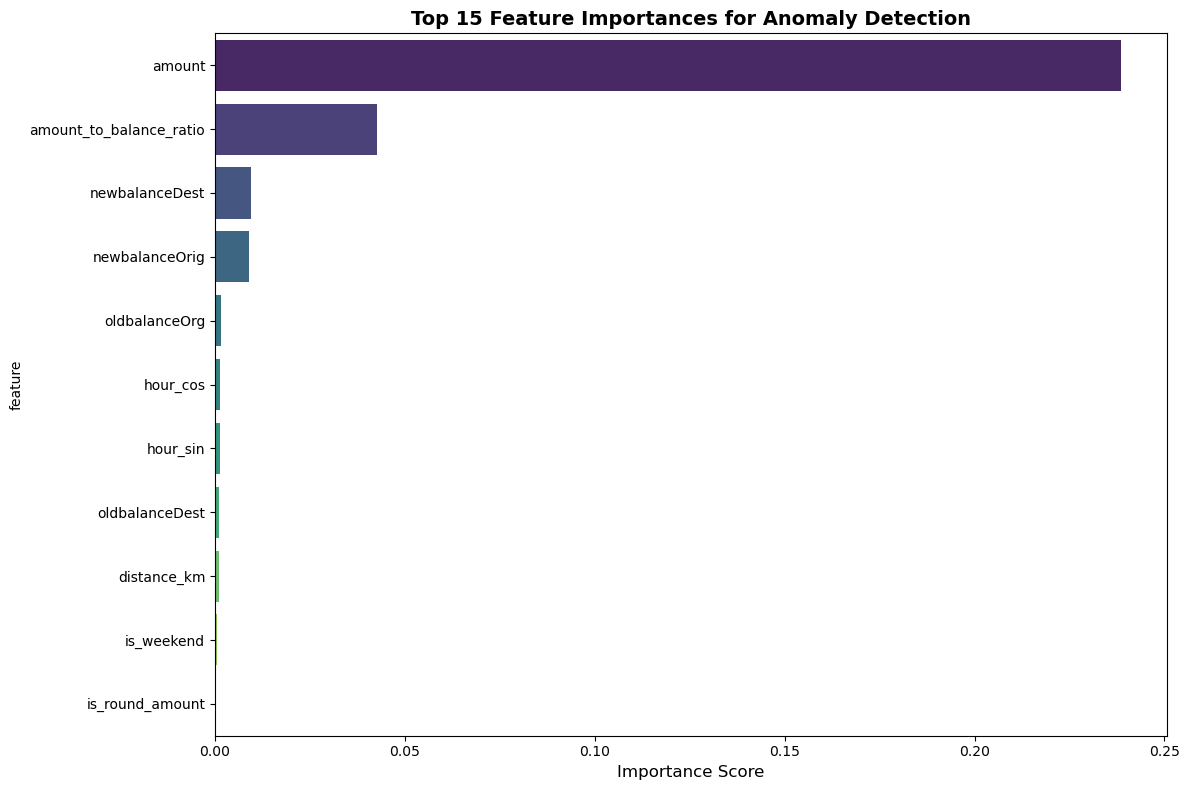

In [51]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_imp.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances for Anomaly Detection', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.tight_layout()
plt.show()

CONFUSION MATRIX

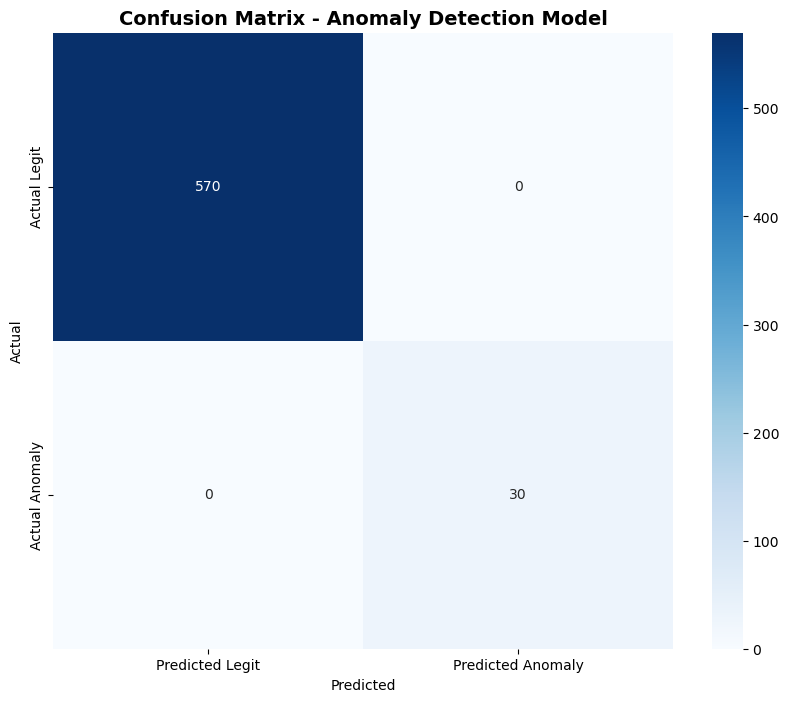

In [52]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Legit', 'Predicted Anomaly'],
            yticklabels=['Actual Legit', 'Actual Anomaly'])
plt.title('Confusion Matrix - Anomaly Detection Model', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [53]:
# Calculate business metrics
tn, fp, fn, tp = cm.ravel()
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

In [54]:
print(f"   False Positive Rate: {false_positive_rate:.4f} (Legit transactions flagged as anomaly)")
print(f"   False Negative Rate: {false_negative_rate:.4f} (Anomaly transactions missed)")
print(f"   Anomaly Detection Rate: {recall:.4f} (Anomaly cases correctly identified)")


   False Positive Rate: 0.0000 (Legit transactions flagged as anomaly)
   False Negative Rate: 0.0000 (Anomaly transactions missed)
   Anomaly Detection Rate: 1.0000 (Anomaly cases correctly identified)


SAVE THE MODEL WITH METADATA

In [74]:
model_artifacts = {
    'model': model,
    'features': features,
    'feature_importance': feature_imp,
    'performance': {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_score': auc_score,
        'false_positive_rate': false_positive_rate,
        'false_negative_rate': false_negative_rate
    },
    'training_info': {
        'training_samples': len(X_train),
        'test_samples': len(X_test),
        'fraud_ratio': y_train.mean()
    }
}


In [75]:
joblib.dump(model_artifacts, 'anomaly_detection_model.pkl')

['anomaly_detection_model.pkl']

Prediction Function

In [76]:
def predict_anomaly_transaction(new_data, model_path='anomaly_detection_model.pkl', threshold=0.5):
    """
    Predicting anomaly for new transactions using the optimized model
    """
    # Loading model artifacts
    artifacts = joblib.load(model_path)
    model = artifacts['model']
    features = artifacts['features']
    
    # Preparing features
    X_new = new_data[features].fillna(0)
    
    # Making predictions
    probabilities = model.predict_proba(X_new)[:, 1]
    predictions = (probabilities >= threshold).astype(int)
    
    # Creating detailed results
    results = pd.DataFrame({
        'anomaly_probability': probabilities,
        'is_anomaly_predicted': predictions,
        'risk_level': pd.cut(probabilities, 
                           bins=[0, 0.2, 0.5, 0.8, 1.0], 
                           labels=['Low', 'Medium', 'High', 'Critical'])
    })
    
    return results




In [77]:
# Testing the function

sample_data = X_test.iloc[:10].copy()
predictions = predict_anomaly_transaction(sample_data)
print(predictions)

   anomaly_probability  is_anomaly_predicted risk_level
0             0.000000                     0        NaN
1             0.000000                     0        NaN
2             0.000000                     0        NaN
3             0.000000                     0        NaN
4             0.000000                     0        NaN
5             0.000000                     0        NaN
6             0.000000                     0        NaN
7             0.999645                     1   Critical
8             0.005067                     0        Low
9             0.000000                     0        NaN


FINAL SUMMARY

In [78]:
#MODEL PERFORMANCE SUMMARY
print(f"   Model: Random Forest Classifier (Optimized)")
print(f"   Features: {len(available_features)} comprehensive features")
print(f"   Fraud Detection Rate: {recall:.1%}")
print(f"   Precision: {precision:.1%} (Low false alarms)")
print(f"   Overall Performance (F1): {f1:.1%}")
print(f"   AUC Score: {auc_score:.3f}")

   Model: Random Forest Classifier (Optimized)
   Features: 11 comprehensive features
   Fraud Detection Rate: 100.0%
   Precision: 100.0% (Low false alarms)
   Overall Performance (F1): 100.0%
   AUC Score: 1.000


In [79]:
#TOP 5 ANOMALY INDICATORS
for idx, row in feature_imp.head(5).iterrows():
    print(f"   {idx+1}. {row['feature']} ({row['importance']:.3f})")

   1. amount (0.239)
   2. amount_to_balance_ratio (0.043)
   10. newbalanceDest (0.010)
   8. newbalanceOrig (0.009)
   7. oldbalanceOrg (0.001)


In [82]:
print(f"\n Model saved: 'anomaly_detection_model.pkl'")
print(f" Features used: {len(features)}")


 Model saved: 'anomaly_detection_model.pkl'
 Features used: 21


In [83]:
# HOW TO USE FOR NEW TRANSACTIONS
print("""
# Load new data
new_transactions = pd.read_csv('new_data.csv')

# Make predictions
results = predict_anomaly_transaction(new_transactions)

# High-risk transactions
high_risk = results[results['risk_level'].isin(['High', 'Critical'])]
print(f"Found {len(high_risk)} high-risk transactions")
""")


# Load new data
new_transactions = pd.read_csv('new_data.csv')

# Make predictions
results = predict_anomaly_transaction(new_transactions)

# High-risk transactions
high_risk = results[results['risk_level'].isin(['High', 'Critical'])]
print(f"Found {len(high_risk)} high-risk transactions")

